# Project: Prediction of NO2 emissions in Zurich

## Machine learning model: random forest

### 1) Identify and discuss random forest model, baseline, metrics and evaluation strategy

#### Random forest

Random forest is a machine learning algorithm that combines the output of multiple decision trees to reach a single result. A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

#### Baseline

The median value of the target (NO2) will be used for the baseline model.

#### Metrics

Mean absolute error (MAE) will be used for the metrics.

#### Evaluation

Model will be evaluated and compared with MAE, the mean of absolute differences between predicted and actual values of NO2 for the baseline and random forest model.

### 2) Tune random forest model and analyze it's performance

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error as MAE

In [2]:
# display all columns
pd.set_option('display.max_columns', None)

In [3]:
# load the data
train = pd.read_csv("train.csv", index_col=0, parse_dates=True)
test = pd.read_csv("test.csv", index_col=0, parse_dates=True)

In [4]:
# show first 5 entries for the training dataset
train.head()

,NO2,RainDur,PH,SH,Hour_sin,Hour_cos,Day_sin,Day_cos,Month_sin,Month_cos,NO2_lag1,NO_lag1,O3_lag1,PM10_lag1,CO_lag1,SO2_lag1,Hr_lag1,T_lag1,WD_lag1,WVv_lag1,p_lag1,StrGlo_lag1
Timestamp,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,37.71,0,1,1,0.000000,1.000000,-0.781831,0.62349,0.0,1.0,3.807773,2.542389,0.683097,4.079738,0.314811,1.040277,87.47,-1.27,283.62,0.708036,977.72,0.04
2017-01-01 01:00:00,39.50,0,1,1,0.258819,0.965926,-0.781831,0.62349,0.0,1.0,3.656098,2.343727,0.896088,4.671707,0.307485,1.442202,87.41,-1.65,292.05,0.858662,977.22,0.03
2017-01-01 02:00:00,38.53,0,1,1,0.500000,0.866025,-0.781831,0.62349,0.0,1.0,3.701302,2.790551,0.854415,4.467057,0.314811,1.091923,87.13,-2.07,296.76,0.746688,976.62,0.04
2017-01-01 03:00:00,39.24,0,1,1,0.707107,0.707107,-0.781831,0.62349,0.0,1.0,3.677060,2.467252,0.703098,4.367928,0.307485,1.029619,86.82,-2.05,281.18,0.620576,976.16,0.03
2017-01-01 04:00:00,41.89,0,1,1,0.866025,0.500000,-0.781831,0.62349,0.0,1.0,3.694862,2.438863,0.932164,4.227709,0.307485,0.947789,87.26,-1.95,257.22,0.530628,975.58,0.03


In [5]:
# show first 5 entries of the test dataset
test.head()

,NO2,RainDur,PH,SH,Hour_sin,Hour_cos,Day_sin,Day_cos,Month_sin,Month_cos,NO2_lag1,NO_lag1,O3_lag1,PM10_lag1,CO_lag1,SO2_lag1,Hr_lag1,T_lag1,WD_lag1,WVv_lag1,p_lag1,StrGlo_lag1
Timestamp,,,,,,,,,,,,,,,,,,,,,,
2017-12-01 00:00:00,15.28,1,0,0,0.000000,1.000000,-0.433884,-0.900969,-0.5,0.866025,3.077773,1.190888,3.768845,2.143589,0.254642,0.357674,84.48,1.73,200.95,0.974560,956.71,0.03
2017-12-01 01:00:00,9.08,1,0,0,0.258819,0.965926,-0.433884,-0.900969,-0.5,0.866025,2.789937,0.824175,3.921181,1.968510,0.239017,0.336472,85.25,1.45,210.79,1.163151,956.62,0.03
2017-12-01 02:00:00,9.02,1,0,0,0.500000,0.866025,-0.433884,-0.900969,-0.5,0.866025,2.310553,0.307485,4.093177,1.528228,0.215111,0.329304,84.43,1.23,240.39,1.335001,956.50,0.02
2017-12-01 03:00:00,10.20,1,0,0,0.707107,0.707107,-0.433884,-0.900969,-0.5,0.866025,2.304583,0.157004,4.189958,1.504077,0.198851,0.307485,88.81,0.12,277.34,0.996949,957.39,0.04
2017-12-01 04:00:00,17.17,0,0,0,0.866025,0.500000,-0.433884,-0.900969,-0.5,0.866025,2.415914,0.350657,4.211387,1.472472,0.190620,0.392042,85.41,-0.14,251.82,0.746688,957.66,0.02


In [6]:
# size of the training dataset
print("Train:", train.shape)

# size of the test dataset
print("Test: ", test.shape)

Train: (8016, 22)
Test:  (744, 22)


Training dataset contains 11 months of data (hourly measurements), from  January to November 2017. Test dataset contains 1 month of data (hourly measurements), from December 2017.

Both datasets contain 22 columns:
- target feature (NO2)
- rain duration (RainDur)
- public holiday (PH)
- school holiday (SH)
- cyclically encoded features for hour, day and month (6 columns)
- 6 lagged air quality features (NO2_lag1, NO_lag1, O3_lag1, PM10_lag1, CO_lag1, SO2_lag1)
- 6 lagged meteorological features (Hr_lag1, T_lag1, WD_lag1, WVv_lag1, p_lag1, StrGlo_lag1)

In [7]:
# one-hot encoding for the RainDur, PH and SH
train = pd.get_dummies(train, columns=['RainDur', 'PH', 'SH'])
test = pd.get_dummies(test, columns=['RainDur', 'PH', 'SH'])

In [8]:
# show first 5 entries of the training dataset
train.head()

,NO2,Hour_sin,Hour_cos,Day_sin,Day_cos,Month_sin,Month_cos,NO2_lag1,NO_lag1,O3_lag1,PM10_lag1,CO_lag1,SO2_lag1,Hr_lag1,T_lag1,WD_lag1,WVv_lag1,p_lag1,StrGlo_lag1,RainDur_0,RainDur_1,PH_0,PH_1,SH_0,SH_1
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,37.71,0.000000,1.000000,-0.781831,0.62349,0.0,1.0,3.807773,2.542389,0.683097,4.079738,0.314811,1.040277,87.47,-1.27,283.62,0.708036,977.72,0.04,1,0,0,1,0,1
2017-01-01 01:00:00,39.50,0.258819,0.965926,-0.781831,0.62349,0.0,1.0,3.656098,2.343727,0.896088,4.671707,0.307485,1.442202,87.41,-1.65,292.05,0.858662,977.22,0.03,1,0,0,1,0,1
2017-01-01 02:00:00,38.53,0.500000,0.866025,-0.781831,0.62349,0.0,1.0,3.701302,2.790551,0.854415,4.467057,0.314811,1.091923,87.13,-2.07,296.76,0.746688,976.62,0.04,1,0,0,1,0,1
2017-01-01 03:00:00,39.24,0.707107,0.707107,-0.781831,0.62349,0.0,1.0,3.677060,2.467252,0.703098,4.367928,0.307485,1.029619,86.82,-2.05,281.18,0.620576,976.16,0.03,1,0,0,1,0,1
2017-01-01 04:00:00,41.89,0.866025,0.500000,-0.781831,0.62349,0.0,1.0,3.694862,2.438863,0.932164,4.227709,0.307485,0.947789,87.26,-1.95,257.22,0.530628,975.58,0.03,1,0,0,1,0,1


In [9]:
# show first 5 entries of the test dataset
test.head()

,NO2,Hour_sin,Hour_cos,Day_sin,Day_cos,Month_sin,Month_cos,NO2_lag1,NO_lag1,O3_lag1,PM10_lag1,CO_lag1,SO2_lag1,Hr_lag1,T_lag1,WD_lag1,WVv_lag1,p_lag1,StrGlo_lag1,RainDur_0,RainDur_1,PH_0,PH_1,SH_0,SH_1
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,
2017-12-01 00:00:00,15.28,0.000000,1.000000,-0.433884,-0.900969,-0.5,0.866025,3.077773,1.190888,3.768845,2.143589,0.254642,0.357674,84.48,1.73,200.95,0.974560,956.71,0.03,0,1,1,0,1,0
2017-12-01 01:00:00,9.08,0.258819,0.965926,-0.433884,-0.900969,-0.5,0.866025,2.789937,0.824175,3.921181,1.968510,0.239017,0.336472,85.25,1.45,210.79,1.163151,956.62,0.03,0,1,1,0,1,0
2017-12-01 02:00:00,9.02,0.500000,0.866025,-0.433884,-0.900969,-0.5,0.866025,2.310553,0.307485,4.093177,1.528228,0.215111,0.329304,84.43,1.23,240.39,1.335001,956.50,0.02,0,1,1,0,1,0
2017-12-01 03:00:00,10.20,0.707107,0.707107,-0.433884,-0.900969,-0.5,0.866025,2.304583,0.157004,4.189958,1.504077,0.198851,0.307485,88.81,0.12,277.34,0.996949,957.39,0.04,0,1,1,0,1,0
2017-12-01 04:00:00,17.17,0.866025,0.500000,-0.433884,-0.900969,-0.5,0.866025,2.415914,0.350657,4.211387,1.472472,0.190620,0.392042,85.41,-0.14,251.82,0.746688,957.66,0.02,1,0,1,0,1,0


In [10]:
# size of the training dataset
print("Train:", train.shape)

# size of the test dataset
print("Test: ", test.shape)

Train: (8016, 25)
Test:  (744, 25)


Training dataset has 8016 rows and 25 columns. Test dataset has 744 rows and 25 columns. There are 3 more columns in both datasets because of one-hot encoding that was applied to public holiday (PH), school holiday (SH) and rain duration (RainDur). 

In [11]:
# specify features and target for the training set
X = train.drop(["NO2"], axis=1).values
y = train["NO2"]

# specify features and target for the test set
X_te = test.drop('NO2', axis=1).values
y_te = test["NO2"]

In [12]:
# baseline
baseline = MAE(y_te, np.median(y) * np.ones(len(y_te)))
print("baseline MAE: {:.2f}".format(baseline))

baseline MAE: 15.93


The MAE score of the baseline is 15.93  µg/m3. Median was used to calculate the baseline.

In [13]:
# random forest: hyperparameters tuning with cross-validation

# number of trees (tuning values)
n_values = [1, 10, 100]

# maximum depth of the tree (tuning values)
d_values = [5, 10, 15]

# variable to store the grid search results
gs_results = []

# grid search
for n in n_values:
    for d in d_values:
        
        forest = TransformedTargetRegressor(
            regressor=RandomForestRegressor(n_estimators=n, 
                                            max_depth=d, 
                                            min_samples_split=20, 
                                            random_state=0),
            func=np.log1p, 
            inverse_func=np.expm1)
        
        # cross-validation object
        cv = TimeSeriesSplit(n_splits=5, test_size=24 * 30 * 1)
    
        # split train set into training and validation sets with 5 splits
        for tr, val in cv.split(X):
            X_tr, X_val = X[tr], X[val]
            y_tr, y_val = y[tr], y[val]
     
            # fit the model
            forest.fit(X_tr, y_tr)

            # save the results of model performance on training and validation sets
            gs_results.append(
                {"n": n,
                "d": d,
                "train_mae": MAE(y_tr, forest.predict(X_tr)),
                "validation_mae": MAE(y_val, forest.predict(X_val))
                }
            )

Random forest is a tree-based model and does not require feature scaling. 

Two hyperparameters were tuned with 3 values each, number of trees (n_estimators) and the maximum depth of the tree (max_depth). The minimum number of samples required to split an internal node was set to 20.

TransformedTargetRegressor was used for the log transformation (log1p) of the target (NO2). 

Cross-validation object (cv) was created with the TimeSeriesSplit. The number of splits is 5 and the validation set is 1 month (24 hours multiplied by 30 days).

Training and validation MAE with corresponding number of trees and maximum depth were saved in the grid search results.

In [14]:
# convert grid search results to dataframe
gs_results = pd.DataFrame(gs_results)

# sort grid search results by the mean validation mae score
gs_results.groupby(['n', 'd']).mean().sort_values(by="validation_mae", ascending=True).head()

train_mae  validation_mae
n   d                            
100 15   3.474443        5.001287
    10   4.009919        5.008653
10  10   4.093946        5.095659
    15   3.602663        5.107949
    5    5.189773        5.245199

The smallest mean validation error is 5.00 µg/m3 which is 44% higher than the mean training error of 3.47 µg/m3.

The optimal number of trees is 100, while the optimal maximum depth of the tree is 15.

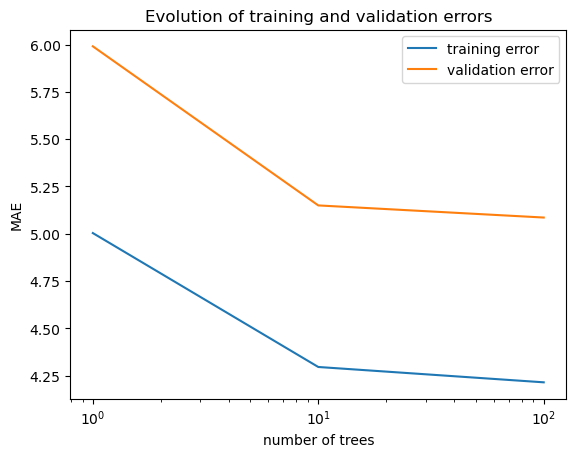

In [15]:
# plot the training error against the number of trees
plt.semilogx(gs_results.groupby("n")["train_mae"].mean().index, 
             gs_results.groupby("n")["train_mae"].mean().values, 
             label="training error")

# plot the validation error against the number of trees
plt.semilogx(gs_results.groupby("n")["validation_mae"].mean().index, 
             gs_results.groupby("n")["validation_mae"].mean().values, 
             label="validation error")

plt.title("Evolution of training and validation errors")
plt.xlabel("number of trees")
plt.ylabel("MAE")
plt.legend()
plt.show()

Training and validation errors plotted against the number of trees indicate overfitting. There is a significant gap between them. Both errors decrease with the increasing number of trees.

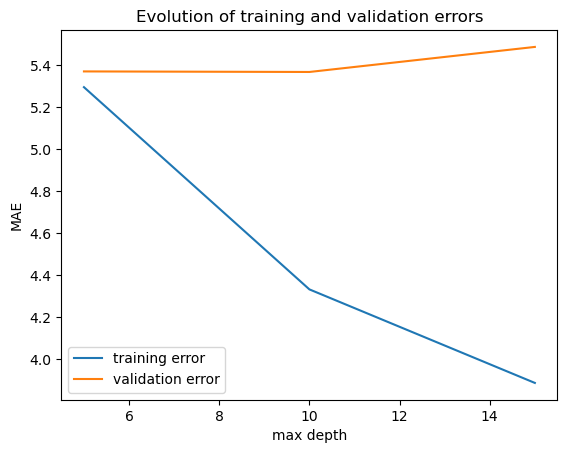

In [16]:
# plot the training error against the max depth
plt.plot((gs_results.groupby("d")["train_mae"].mean().index), 
         gs_results.groupby("d")["train_mae"].mean().values, 
         label="training error")

# plot the validation error against the max depth
plt.plot(((gs_results.groupby("d")["validation_mae"].mean().index)), 
         gs_results.groupby("d")["validation_mae"].mean().values, 
         label="validation error")

plt.title("Evolution of training and validation errors")
plt.xlabel("max depth")
plt.ylabel("MAE")
plt.legend()
plt.show()

Training and validation errors plotted against the maximum depth of the tree indicate overfitting. There is a significant gap between the errors, that increases with the increasing depth of the tree.

In [17]:
# tuned random forest (100 trees and depth of 10)     
tuned_forest = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=20, random_state=0)

# fit tuned random forest
tuned_forest.fit(X, y)

RandomForestRegressor(max_depth=15, min_samples_split=20, random_state=0)

In [18]:
# evaluate on the test set
y_pred_rf = tuned_forest.predict(X_te)

rf_mae = MAE(y_te, y_pred_rf)
print("random forest MAE: {:.2f}".format(rf_mae))

random forest MAE: 4.93


The MAE score of the tuned random forest model is 4.93 µg/m3 which is significantly lower than the baseline of 15.93 µg/m3.

### 3) Discuss the results and potential trade-offs

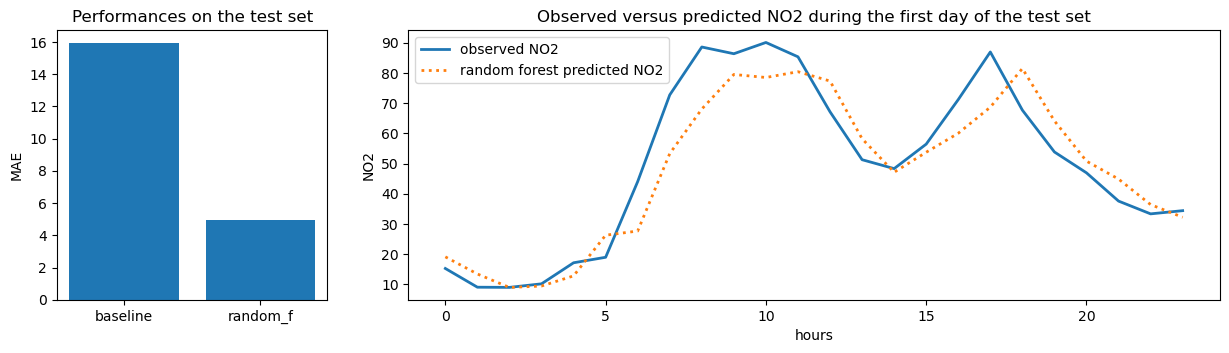

In [19]:
# plots with MAE scores and observed and predicted NO2 on the first day of the test set

# defining the number of subplots and setting the size
fig, axes = plt.subplots(
    1, 2, figsize=(15, 3.5), gridspec_kw={"wspace": 0.15, "width_ratios": [1, 3]}
)

# plot with MAE scores of the baseline and random forest model
axes[0].bar(np.arange(2), [baseline, rf_mae])
axes[0].set_xticks(np.arange(2))
axes[0].set_xticklabels(("baseline", "random_f"))
axes[0].set_ylabel("MAE")
axes[0].set_title("Performances on the test set")

# plot with observed and predicted values during the first day of the test set
axes[1].plot(y_te.values[:24], lw=2, label="observed NO2")
axes[1].plot(y_pred_rf[:24], ls=":", lw=2, label="random forest predicted NO2")

axes[1].set_title("Observed versus predicted NO2 during the first day of the test set")
axes[1].set_xlabel("hours")
axes[1].set_ylabel("NO2")
axes[1].legend()

plt.show()

The MAE score of the random forest model (4.93 µg/m3) is 3x lower than the baseline of 15.93 µg/m3.

The first day of the test set, Friday, December 1, 2017, shows underpredictions in the morning and afternoon hours, and overpredictions around noon and in the evening.

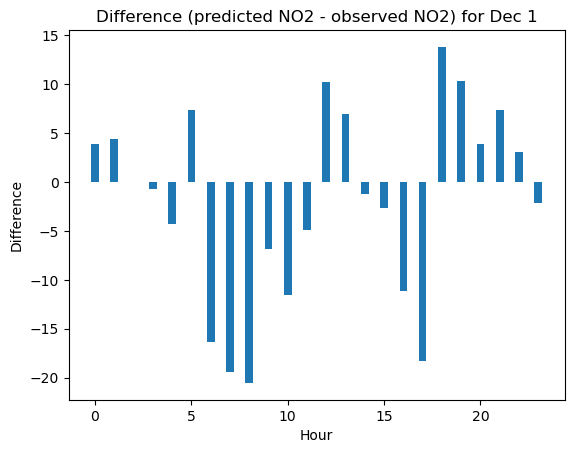

In [20]:
# plot the difference (predicted NO2 - observed NO2) for the first day of the test set
plt.bar(np.arange(0,24,1), (y_pred_rf[:24]-y_te[:24]), width = 0.4)

plt.title('Difference (predicted NO2 - observed NO2) for Dec 1')
plt.xlabel('Hour')
plt.ylabel('Difference')
plt.show()

Bar plot with differences between predicted NO2 and observed NO2 on Friday, December 1, show significant underpredictions from 6:00 to 11:00 and from 14:00 to 17:00, when there is more traffic in Zurich. Overpredictions are from 12:00 to 13:00 and from 18:00 to 22:00. 

In [21]:
# dataframe with observed NO2 and predicted NO2

# convert observed NO2 (y_te) to dataframe
df_diff = y_te.to_frame()

# add column with predicted NO2
df_diff['NO2_pred'] = y_pred_rf.tolist()

# calculate the difference: predicted NO2 - observed NO2
df_diff['Diff'] = df_diff['NO2_pred'] - df_diff['NO2']

# add time feature (hour)
df_diff['Hour'] = df_diff.index.hour

# add time feature (day)
df_diff["Day"] = df_diff.index.day

In [22]:
# show first 5 entries
df_diff.head()

,NO2,NO2_pred,Diff,Hour,Day
Timestamp,,,,,
2017-12-01 00:00:00,15.28,19.130160,3.850160,0,1
2017-12-01 01:00:00,9.08,13.458219,4.378219,1,1
2017-12-01 02:00:00,9.02,8.992450,-0.027550,2,1
2017-12-01 03:00:00,10.20,9.469942,-0.730058,3,1
2017-12-01 04:00:00,17.17,12.832293,-4.337707,4,1


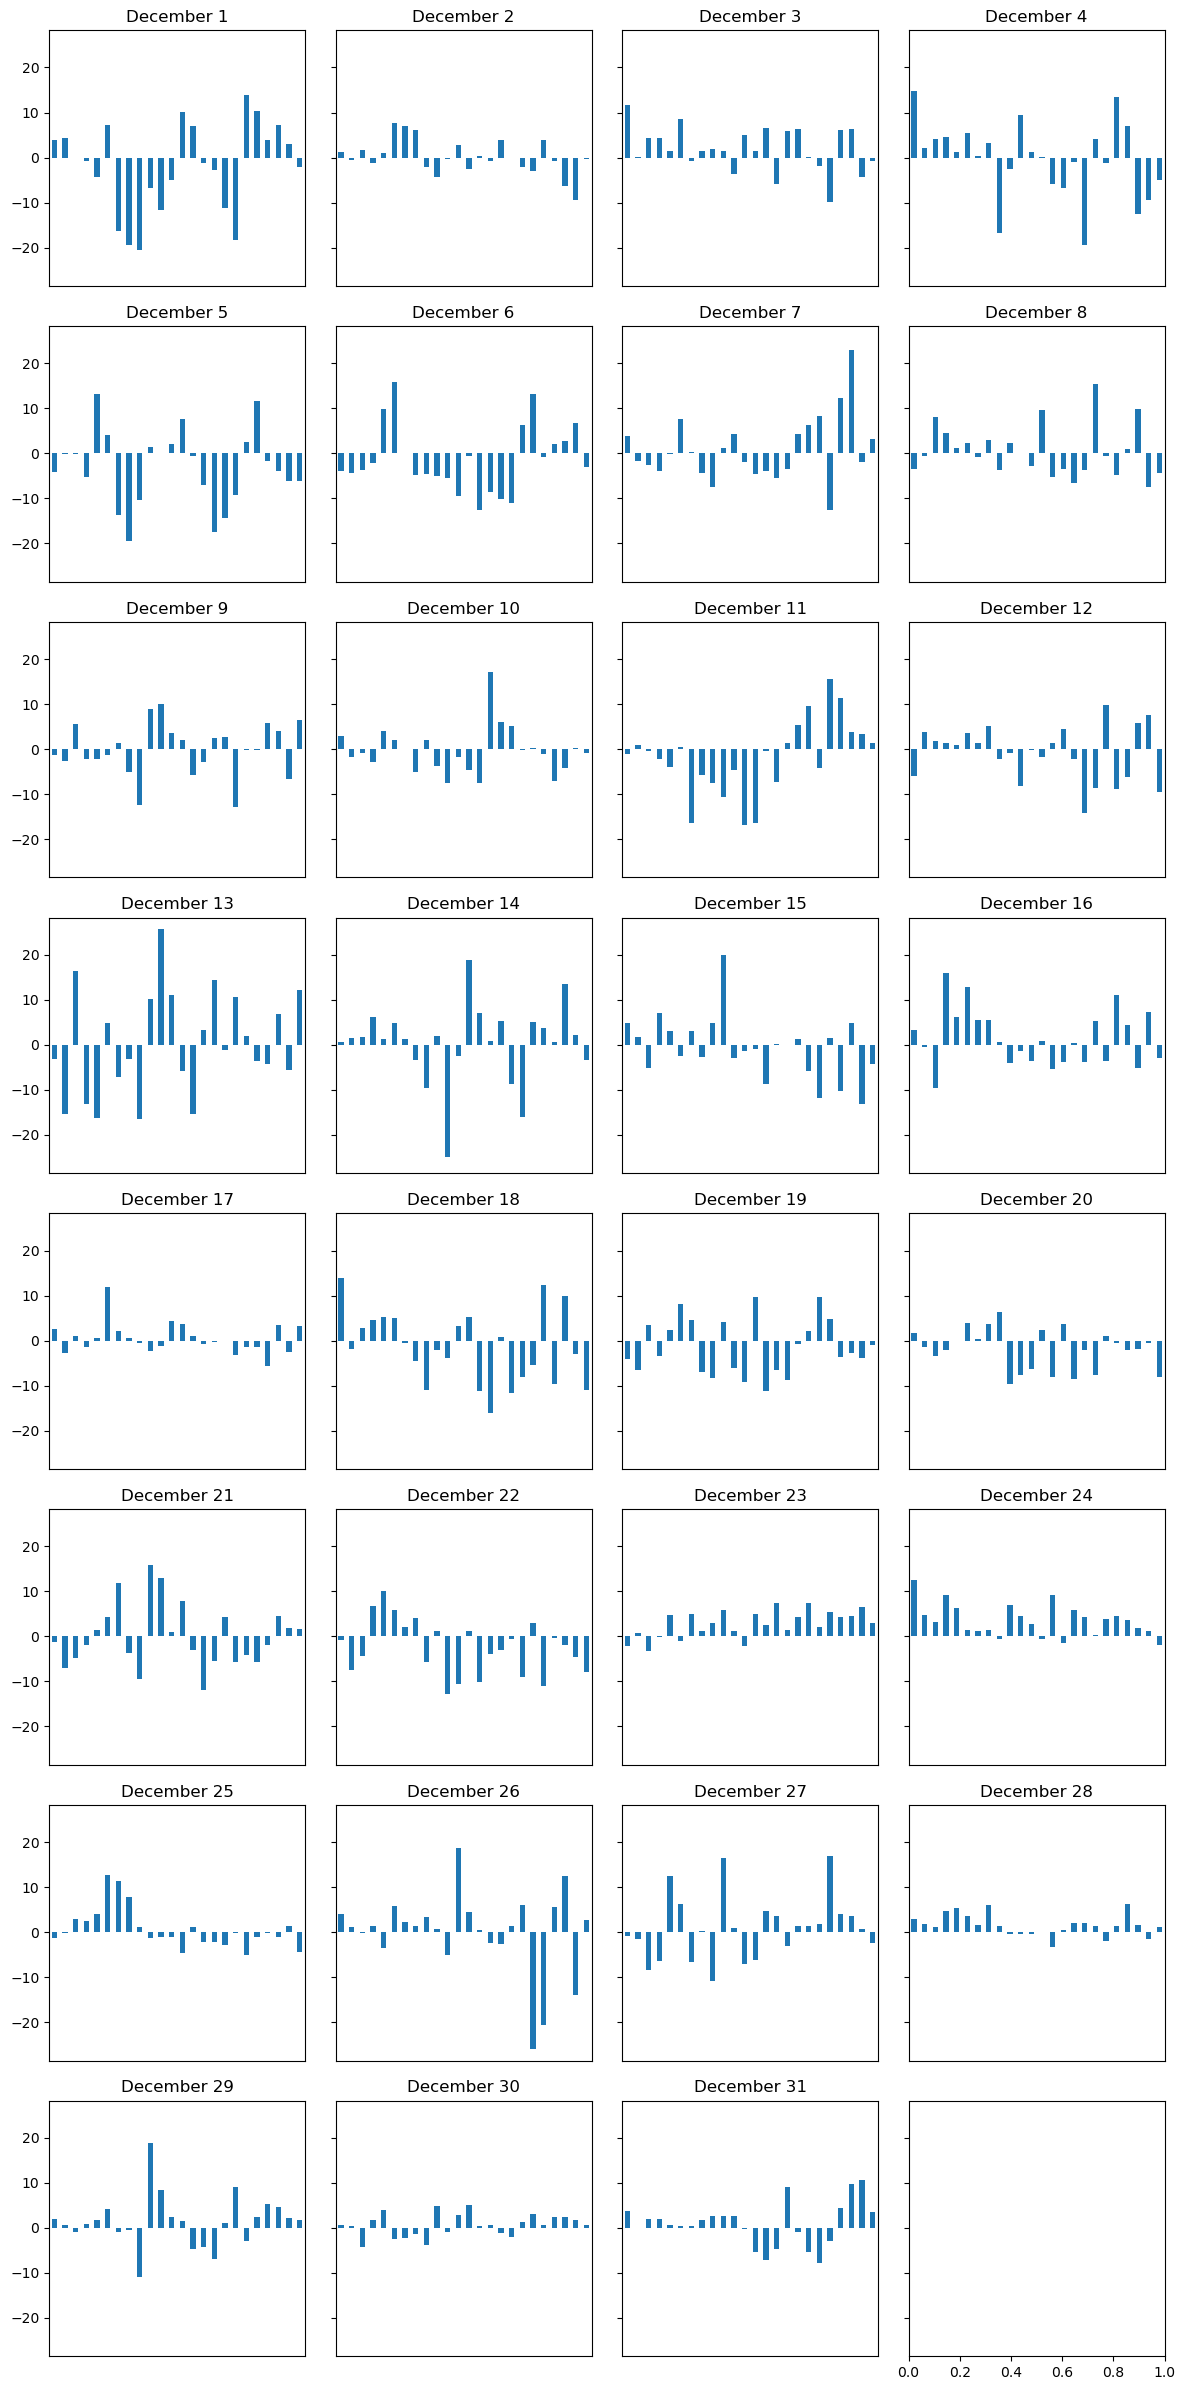

In [23]:
# plot the difference (predicted NO2 - observed NO2) for the whole test set 

# defining the number of subplots and setting the size
fig, axes = plt.subplots(nrows=8, ncols=4, sharey=True, figsize=(12, 24))

for i in range(8):
    for j in range(4):
        day = 4*i+j+1
        if (day < 32):
            df_diff[df_diff['Day']==day]['Diff'].plot(ax=axes[i,j], kind='bar')
            axes[i,j].set_title("December " + str(day))
            axes[i,j].get_xaxis().set_visible(False)

plt.tight_layout()
plt.show()

Bar plots with the difference between predicted NO2 and observed NO2 for the whole month of December show mainly underpredictions on working days in the morning hours, when there is more traffic in Zurich.

On weekends (December 2, 3, 9, 10, 16, 17, 23, 24, 30, 31) differences between predicted NO2 and observed NO2 are not that high as on working days.

December 23 and 24 show mainly small overpredictions. This was the weekend before public holidays on December 25 and 26, and one would expect less traffic in Zurich. Therefore, overpredictions are understandable.

The model was trained on the train set from January to November, which makes December predictions harder. A larger training dataset of at least a year should provide better results.

### 4) Summary

Random forest model was trained and tuned on the train set (11 months) and predictions were made on the test set (1 month).

First, one-hot encoding was applied to 3 features, rain duration (RainDur), public holiday (PH) and school holiday (SH). There was no feature scaling. Two hyperparameters were tuned with 3 values each, number of trees (n_estimators) and the maximum depth of the tree (max_depth). TranformedTargetRegressor was used for the log transformation (log1p) of the target (NO2). Cross-validation object (cv) was created with the TimeSeriesSplit. The number of splits was 5 and the validation set was 1 month (24 hours multiplied by 30 days).

The optimal number of trees is 100, while the optimal maximum depth of the tree is 15. The smallest mean validation error is 5.00 µg/m3 which is 44% higher than the mean training error of 3.47 µg/m3. The model is overfitting, as seen on 2 graphs with training and validation errors against hyperparameters.

Tuned model with the optimal hyperparameters was then fitted on the train set and evaluated on the test set. The MAE score of the tuned random model is 4.93 µg/m3 which is 3x lower than the baseline of 15.93 µg/m3.

The first day of the test set, Friday, December 1, 2017, showed underpredictions in the morning and afternoon hours, and overpredictions around noon and in the evening.

The whole test set (December 2017) showed mainly underpredictions on working days in the morning hours.

Training the model on a larger dataset, instead of 11 months, should improve predictions.